<a href="https://colab.research.google.com/github/Rajcr2/CD/blob/main/DETR_lbw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

'/content'

In [ ]:
!pip install supervision==0.3.0

In [ ]:
!pip install -i https://test.pypi.org/simple supervision==0.3.0

Looking in indexes: https://test.pypi.org/simple


In [ ]:
!pip install -q transformers

In [ ]:
!pip install -q pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 31.8 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install -q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.5 MB/s eta 0:00:00


In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu' )
CHECKPOINT = 'facebook/detr-resnet-50'
CONFIDENCE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.8

image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT)
model = DetrForObjectDetection.from_pretrained(CHECKPOINT)
model.to(DEVICE)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [ ]:
import os

image_path = "/content/drive/MyDrive/Dataset/DRS_lbw/train/no_13_jpg.rf.2f6690d7ef5842c5767bda6456a1b89e.jpg"

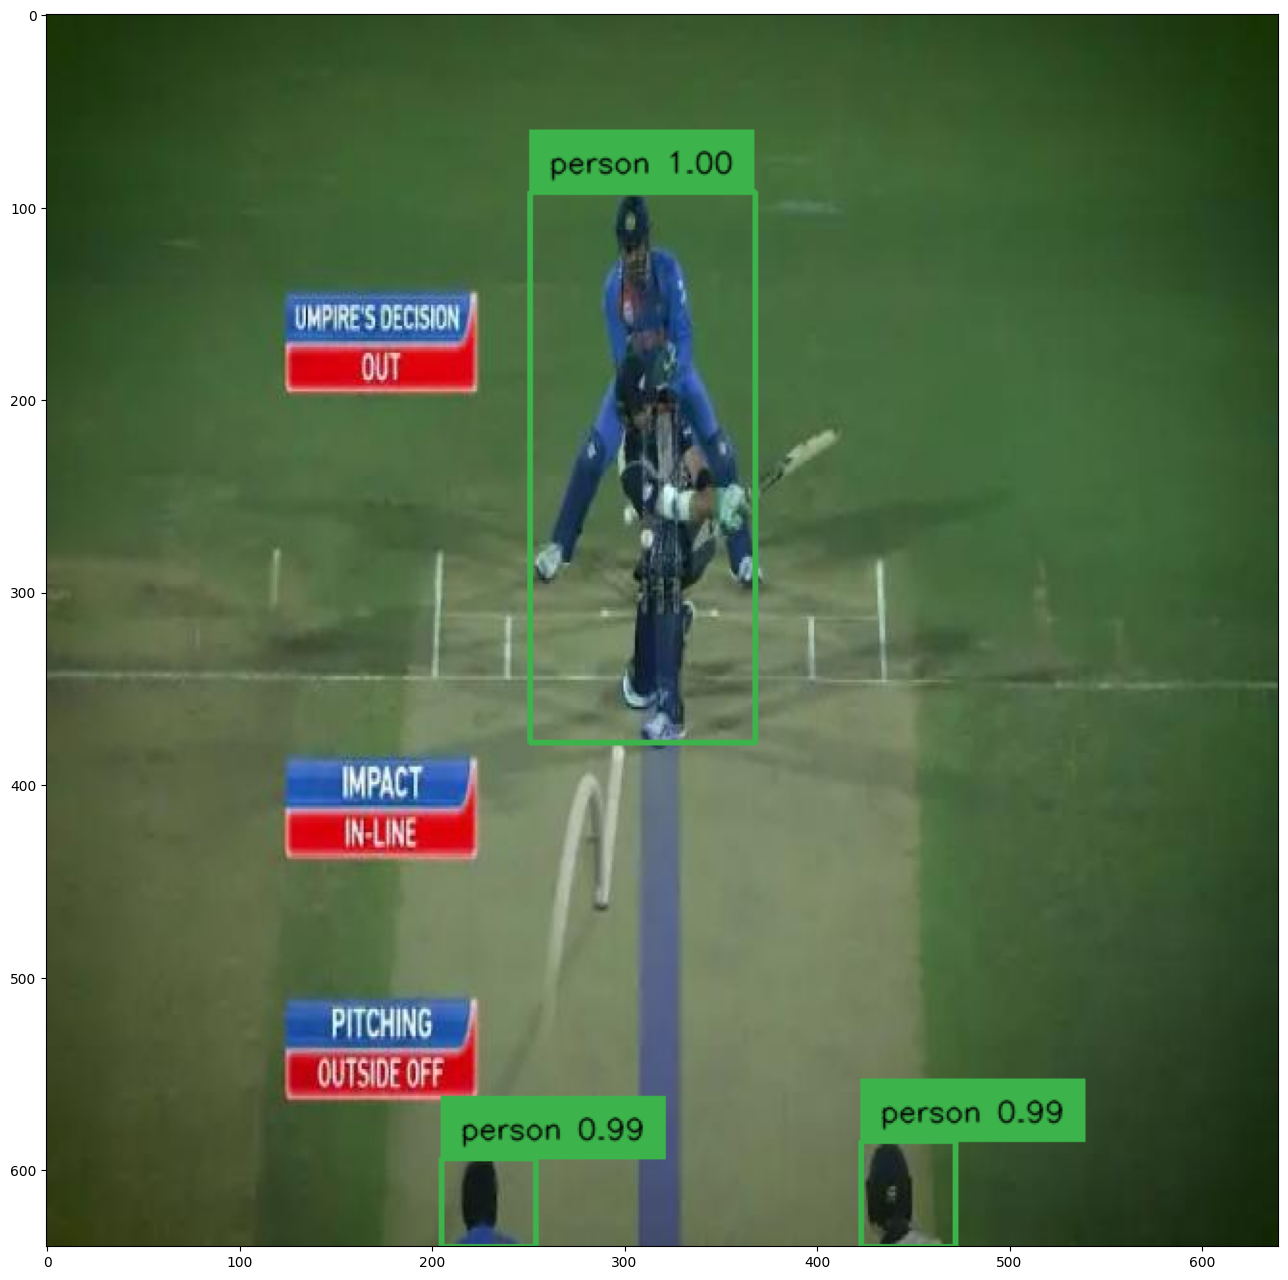

In [ ]:
import cv2
import torch
import supervision as sv

with torch.no_grad():

  image = cv2.imread(image_path)
  inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
  outputs = model(**inputs)

  target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
  results = image_processor.post_process_object_detection(
      outputs=outputs,
      threshold=CONFIDENCE_THRESHOLD,
      target_sizes=target_sizes
  )[0]

detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=IOU_THRESHOLD)

labels = [
    f"{model.config.id2label[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(frame, (16,16))



In [ ]:
import os
import torchvision

dataset = '/content/drive/MyDrive/Dataset/DRS_lbw'

Annotation_file = "_annotations.coco.json"
TRAIN_Directory = os.path.join(dataset, "train")
VAL_Directory = os.path.join(dataset, "valid")
TEST_Directory = os.path.join(dataset, "test")

#Annotation_file = os.path.join(dataset, '/content/drive/MyDrive/Crime_Detection/_annotations.coco.json')
#TRAIN_Directory = os.path.join(dataset, '/content/drive/MyDrive/Crime_Detection/train')
#VAL_Directory = os.path.join(dataset, '/content/drive/MyDrive/Crime_Detection/valid')
#TEST_Directory = os.path.join(dataset, '/content/drive/MyDrive/Crime_Detection/test')

class CocoDetection(torchvision.datasets.CocoDetection):
  def __init__(
      self,
      image_directory_path: str,
      image_processor,
      train: bool = True
  ):

      annotation_file_path = os.path.join(image_directory_path, Annotation_file)
      super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
      self.image_processor = image_processor

  def __getitem__(self, idx):
    images, annotations = super(CocoDetection, self).__getitem__(idx)
    image_id = self.ids[idx]
    annotations = {'image_id': image_id, 'annotations': annotations}
    encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
    pixel_values = encoding["pixel_values"].squeeze()
    target = encoding["labels"][0]

    return pixel_values, target

TRAIN_DATASET = CocoDetection(image_directory_path=TRAIN_Directory, image_processor=image_processor, train=True)
VAL_DATASET = CocoDetection(image_directory_path=VAL_Directory, image_processor=image_processor, train=False)
TEST_DATASET = CocoDetection(image_directory_path=TEST_Directory, image_processor=image_processor, train=False)

print("No. of training examples :", len(TRAIN_DATASET))
print("No. of validation examples :", len(VAL_DATASET))
print("No. of test examples :", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
No. of training examples : 28
No. of validation examples : 9
No. of test examples : 3


Image #26


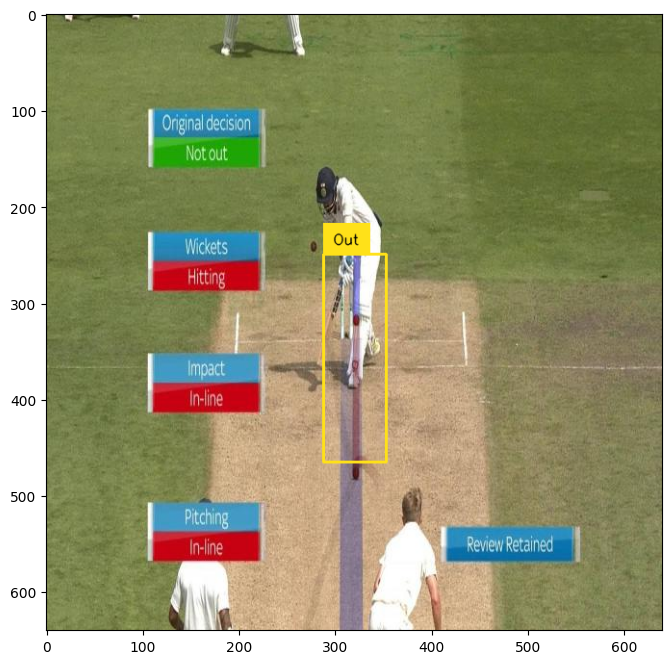

In [ ]:
import random
import cv2
import numpy as np
import supervision as sv


# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

from PIL import Image
import os
from pathlib import Path

path = r"/content/drive/MyDrive/Dataset/DRS_lbw/train"
os.chdir(path)

image_path = f"/content/drive/MyDrive/Dataset/DRS_lbw/train/out_4_jpg.rf.74b735d9499bcdb57c7c6fca6da52863.jpg"  # Image file path

# load image and annotatons
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (8, 8))

In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    return batch
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding ['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4)

In [ ]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch

class Detr(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
      super().__init__()
      self.model = DetrForObjectDetection.from_pretrained(
          pretrained_model_name_or_path=CHECKPOINT,
          num_labels=len(id2label),
          ignore_mismatched_sizes=True
      )

      self.lr = lr
      self.lr_backbone = lr_backbone
      self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
      return self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    def common_step(self, batch, batch_idx):
      pixel_values = batch["pixel_values"]
      pixel_mask = batch["pixel_mask"]
      labels = [{k: v.to(self.device) for k,v in t.items()} for t in batch["labels"]]

      outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

      loss = outputs.loss
      loss_dict = outputs.loss_dict

      return loss, loss_dict

    def training_step(self, batch, batch_idx):
      loss, loss_dict = self.common_step(batch, batch_idx)
      self.log("training_loss", loss)
      for k,v in loss_dict.items():
        self.log("train_" + k,v.item())

        return loss

    def validation_step(self, batch, batch_idx):
      loss, loss_dict = self.common_step(batch, batch_idx)
      self.log("validation_loss", loss)
      for k,v in loss_dict.items():
        self.log("validation_" + k,v.item())

        return loss

    def configure_optimizers(self):

        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_deacy)

    def train_dataloader(self):
        return TRAIN_DATALOADER

    def val_dataloader(self):
        return VAL_DATALOADER






In [ ]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DetrForObjectDetection were not initialized from the model checkpoin

TypeError: list indices must be integers or slices, not str